In [1]:
import os
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

In [4]:
dataCSV = os.path.join(os.getcwd(), "..", "CSGODemo", "Dataset", "CSGODataset.csv")
modelSaveFolder = os.path.join(os.getcwd(), "modelSave")

df = pd.read_csv(dataCSV)

print(df.columns.tolist())

invalidRows = (df == -1).any(axis=1)

print(f"Invalid rows --> {invalidRows}")

print(df.dtypes)

C:\Users\S_CSIS-PostGrad\AppData\Local\Temp\ipykernel_21748\1437579263.py:4: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dataCSV)


['Team1_Player1_Kills', 'Team1_Player1_Assists', 'Team1_Player1_Deaths', 'Team1_Player1_HeadshotsPerc', 'Team1_Player1_KR_Ratio', 'Team1_Player1_KD_Ratio', 'Team1_Player1_KAST', 'Team1_Player1_EntryKills', 'Team1_Player1_RWS', 'Team1_Player1_Rating', 'Team1_Player1_Rating2', 'Team1_Player1_ATD', 'Team1_Player1_ADR', 'Team1_Player1_ELO', 'Team1_Player2_Kills', 'Team1_Player2_Assists', 'Team1_Player2_Deaths', 'Team1_Player2_HeadshotsPerc', 'Team1_Player2_KR_Ratio', 'Team1_Player2_KD_Ratio', 'Team1_Player2_KAST', 'Team1_Player2_EntryKills', 'Team1_Player2_RWS', 'Team1_Player2_Rating', 'Team1_Player2_Rating2', 'Team1_Player2_ATD', 'Team1_Player2_ADR', 'Team1_Player2_ELO', 'Team1_Player3_Kills', 'Team1_Player3_Assists', 'Team1_Player3_Deaths', 'Team1_Player3_HeadshotsPerc', 'Team1_Player3_KR_Ratio', 'Team1_Player3_KD_Ratio', 'Team1_Player3_KAST', 'Team1_Player3_EntryKills', 'Team1_Player3_RWS', 'Team1_Player3_Rating', 'Team1_Player3_Rating2', 'Team1_Player3_ATD', 'Team1_Player3_ADR', 'Team1

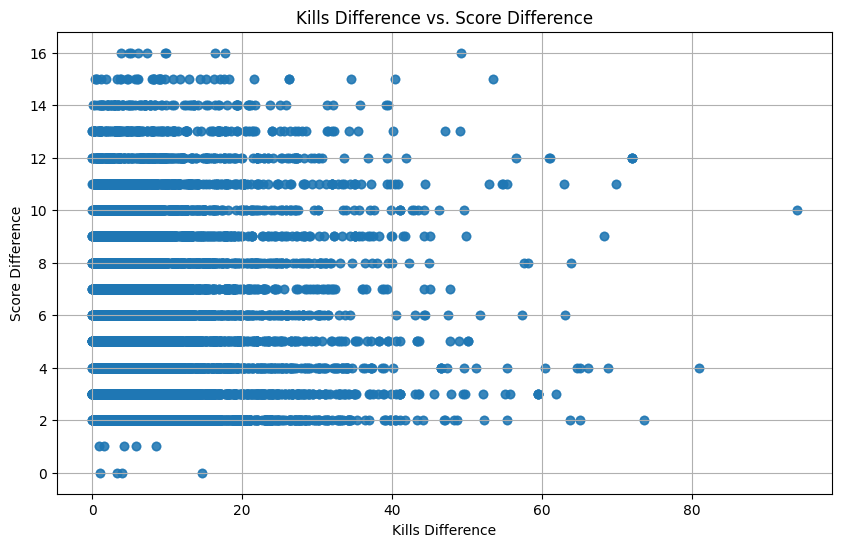

In [14]:
damage_columns = [col for col in df.columns if col.endswith('_ADR')]
df[damage_columns] = df[damage_columns].apply(pd.to_numeric, errors='coerce')

# Assuming your dataframe is named 'df'

# Convert relevant columns to numeric
numeric_columns = ['ScoreDifference', 'Team1_Player1_Kills', 'Team1_Player2_Kills', 'Team1_Player3_Kills', 'Team1_Player4_Kills', 'Team1_Player5_Kills',
                   'Team2_Player1_Kills', 'Team2_Player2_Kills', 'Team2_Player3_Kills', 'Team2_Player4_Kills', 'Team2_Player5_Kills']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

# Calculate total kills for Team 1 and Team 2
df['Team1_TotalKills'] = df['Team1_Player1_Kills'] + df['Team1_Player2_Kills'] + df['Team1_Player3_Kills'] + df['Team1_Player4_Kills'] + df['Team1_Player5_Kills']
df['Team2_TotalKills'] = df['Team2_Player1_Kills'] + df['Team2_Player2_Kills'] + df['Team2_Player3_Kills'] + df['Team2_Player4_Kills'] + df['Team2_Player5_Kills']

# Calculate kills difference
df['KillsDifference'] = abs(df['Team1_TotalKills'] - df['Team2_TotalKills'])

# Plot KillsDifference against ScoreDifference
plt.figure(figsize=(10, 6))
plt.scatter(df['KillsDifference'], df['ScoreDifference'], alpha=0.5)
plt.title('Kills Difference vs. Score Difference')
plt.xlabel('Kills Difference')
plt.ylabel('Score Difference')
plt.grid(True)
plt.show()